# Data Preprocessing

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/Users/dhikshamathan/Downloads/Shopping-Trends/shopping_trends_updated.csv')
original_features = data.columns.tolist()

In [ ]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


Data Tranformation

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

In [ ]:
rating_bins = [0, 2, 3, 4, 5]
rating_labels = ['Very Low', 'Low', 'Medium', 'High']
data['Review_Rating_Category'] = pd.cut(data['Review Rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)

Feature Encoding

In [ ]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']
num_cols = [col for col in data.columns if data[col].dtype != 'object' and data[col].dtype == 'category']

In [ ]:
cat_cols

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'AgeGroup',
 'Review_Rating_Category']

In [ ]:
num_cols

['AgeGroup', 'Review_Rating_Category']

In [ ]:
def categorize_columns(df, cat_cols):
    less_than_or_equal_10 = []
    greater_than_10 = []

    for col in cat_cols:
        unique_values = df[col].nunique()
        if unique_values <= 10:
            less_than_or_equal_10.append(col)
        else:
            greater_than_10.append(col)
    return less_than_or_equal_10, greater_than_10

In [ ]:
less_than_or_equal_10, greater_than_10 = categorize_columns(data, cat_cols)

In [ ]:
less_than_or_equal_10

['Gender',
 'Category',
 'Size',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'AgeGroup',
 'Review_Rating_Category']

In [ ]:
greater_than_10

['Item Purchased', 'Location', 'Color']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def categorize_columns(df, cat_cols):
    less_than_or_equal_10 = []
    greater_than_10 = []

    for col in cat_cols:
        unique_values = df[col].nunique()
        if unique_values <= 10:
            less_than_or_equal_10.append(col)
        else:
            greater_than_10.append(col)
    return less_than_or_equal_10, greater_than_10

cat_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']
less_than_or_equal_10, greater_than_10 = categorize_columns(data, cat_cols)

In [ ]:
le = LabelEncoder()
for col in less_than_or_equal_10:
    data[col] = le.fit_transform(data[col])

In [ ]:
def target_guided_encoding(i_col, t_col):
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key: index for index, key in enumerate(i_col_index, 0)}
    data[i_col] = data[i_col].map(i_col_dict)

for col in greater_than_10:
    target_guided_encoding(col, 'Subscription Status')

Feature Extraction

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = data.drop(['Subscription Status'], axis=1)
y = data['Subscription Status']

In [ ]:
mi = mutual_info_classif(X, y)
mi

array([0.58281442, 0.01703394, 0.13994477, 0.00397048, 0.0047403 ,
       0.00816951, 0.00858817, 0.        , 0.00194129, 0.        ,
       0.        , 0.        , 0.29801697, 0.30870989, 0.        ,
       0.        , 0.01198529, 0.00660877, 0.        ])

In [ ]:
mi_df = pd.DataFrame(mi, index=X.columns, columns=['Importance'])
zero_importance_features = mi_df[mi_df['Importance'] == 0].index.tolist()

In [ ]:
mi_df

,Importance
Customer ID,0.582814
Age,0.017034
Gender,0.139945
Item Purchased,0.003970
Category,0.004740
Purchase Amount (USD),0.008170
Location,0.008588
Size,0.000000
Color,0.001941
Season,0.000000


In [ ]:
data.drop(columns=zero_importance_features, inplace=True)

In [ ]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Subscription Status,Discount Applied,Promo Code Used,Frequency of Purchases,AgeGroup
0,1,55,1,0,0,53,44,11,1,1,1,3,3
1,2,19,1,24,0,64,15,7,1,1,1,3,1
2,3,50,1,22,0,73,42,7,1,1,1,6,2
3,4,21,1,6,3,90,37,7,1,1,1,6,1
4,5,45,1,0,0,49,13,24,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,14,0,28,41,24,0,0,0,6,2
3896,3897,52,0,19,1,49,38,21,0,0,0,1,3
3897,3898,46,0,3,1,33,8,18,0,0,0,5,2
3898,3899,44,0,18,3,77,35,4,0,0,0,6,2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.73160675,  0.71891344,  0.68599434, ...,  0.01257477,
         1.11385805,  1.09417163],
       [-1.73071852, -1.64862924,  0.68599434, ...,  0.01257477,
        -1.16887784,  1.09417163],
       [-1.72983029,  0.39008807,  0.68599434, ...,  1.51384863,
        -0.02750989,  1.09417163],
       ...,
       [ 1.72983029,  0.12702777, -1.45773797, ...,  1.01342401,
        -0.02750989, -0.03683005],
       [ 1.73071852, -0.00450238, -1.45773797, ...,  1.51384863,
        -0.02750989,  1.09417163],
       [ 1.73160675,  0.52161822, -1.45773797, ...,  1.01342401,
         1.11385805,  1.09417163]])

# Machine Learning Models

K-Nearest Neighbors (KNN) classifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

knn_model = KNeighborsClassifier()

cv_scores = cross_val_score(knn_model, X_train_val, y_train_val, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

y_val_pred = knn_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

y_test_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Cross-Validation Accuracy Scores: [0.8525641  0.86538462 0.89423077 0.86217949 0.87660256]
Mean CV Accuracy: 0.87
Training Accuracy: 0.91
Validation Accuracy: 0.86
Test Accuracy: 0.86


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1725
           1       0.78      0.91      0.84       615

    accuracy                           0.91      2340
   macro avg       0.87      0.91      0.89      2340
weighted avg       0.92      0.91      0.91      2340


Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       564
           1       0.75      0.76      0.76       216

    accuracy                           0.86       780
   macro avg       0.83      0.83      0.83       780
weighted avg       0.86      0.86      0.86       780


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       558
           1       0.72      0.81      0.76       222

    accuracy                           0.86       780
   m

Gausian Naive

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
gnb_model = GaussianNB()

cv_scores = cross_val_score(gnb_model, X_train_val, y_train_val, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

gnb_model.fit(X_train, y_train)

y_train_pred = gnb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

y_val_pred = gnb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

y_test_pred = gnb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Cross-Validation Accuracy Scores: [0.83814103 0.83814103 0.85737179 0.83814103 0.84615385]
Mean CV Accuracy: 0.84
Training Accuracy: 0.84
Validation Accuracy: 0.86
Test Accuracy: 0.83


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88      1725
           1       0.62      1.00      0.76       615

    accuracy                           0.84      2340
   macro avg       0.81      0.89      0.82      2340
weighted avg       0.90      0.84      0.85      2340


Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89       564
           1       0.67      1.00      0.80       216

    accuracy                           0.86       780
   macro avg       0.83      0.90      0.85       780
weighted avg       0.91      0.86      0.87       780


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   m

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X_train_val, y_train_val, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.2f}")

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Set Accuracy: {val_accuracy:.2f}")

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Cross-Validation Scores: [0.99679487 0.99358974 0.99679487 0.99519231 0.99198718]
Mean CV Score: 0.99
Training Set Accuracy: 1.00
Validation Set Accuracy: 1.00
Test Set Accuracy: 1.00


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1725
           1       1.00      1.00      1.00       615

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       564
           1       1.00      0.99      0.99       216

    accuracy                           1.00       780
   macro avg       1.00      0.99      1.00       780
weighted avg       1.00      1.00      1.00       780


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      0.99      0.99       222

    accuracy                           1.00       780
   m

Reducing overfitting using PCA

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

pca = PCA(n_components=0.70)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

model = LogisticRegression()
model.fit(X_train_pca, y_train)

y_train_pred = model.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

y_val_pred = model.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Set Accuracy: {val_accuracy:.2f}")

y_test_pred = model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

X_train_val_pca = pca.transform(X_train_val)
scores = cross_val_score(model, X_train_val_pca, y_train_val, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean():.2f}")

Training Set Accuracy: 0.98
Validation Set Accuracy: 0.98
Test Set Accuracy: 0.98
Cross-Validation Scores: [0.97916667 0.97275641 0.98717949 0.98397436 0.96794872]
Mean CV Score: 0.98


In [ ]:
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Validation Data:")
print(classification_report(y_val, y_val_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1725
           1       0.96      0.96      0.96       615

    accuracy                           0.98      2340
   macro avg       0.97      0.97      0.97      2340
weighted avg       0.98      0.98      0.98      2340


Classification Report for Validation Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       564
           1       0.97      0.97      0.97       216

    accuracy                           0.98       780
   macro avg       0.98      0.98      0.98       780
weighted avg       0.98      0.98      0.98       780


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       558
           1       0.97      0.97      0.97       222

    accuracy                           0.98       780
   m

Confusion Matrix for Training Data:
[[1722    3]
 [   2  613]]
Confusion Matrix for Validation Data:
[[564   0]
 [  3 213]]


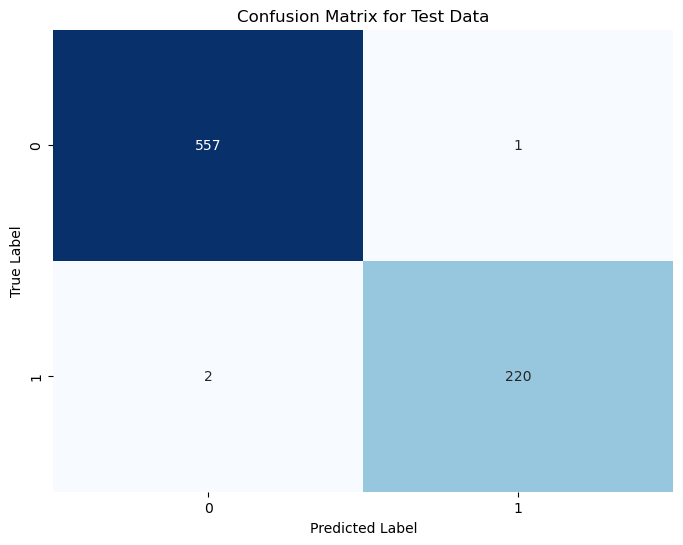

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix for Validation Data:")
print(confusion_matrix(y_val, y_val_pred))

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, "Confusion Matrix for Test Data")

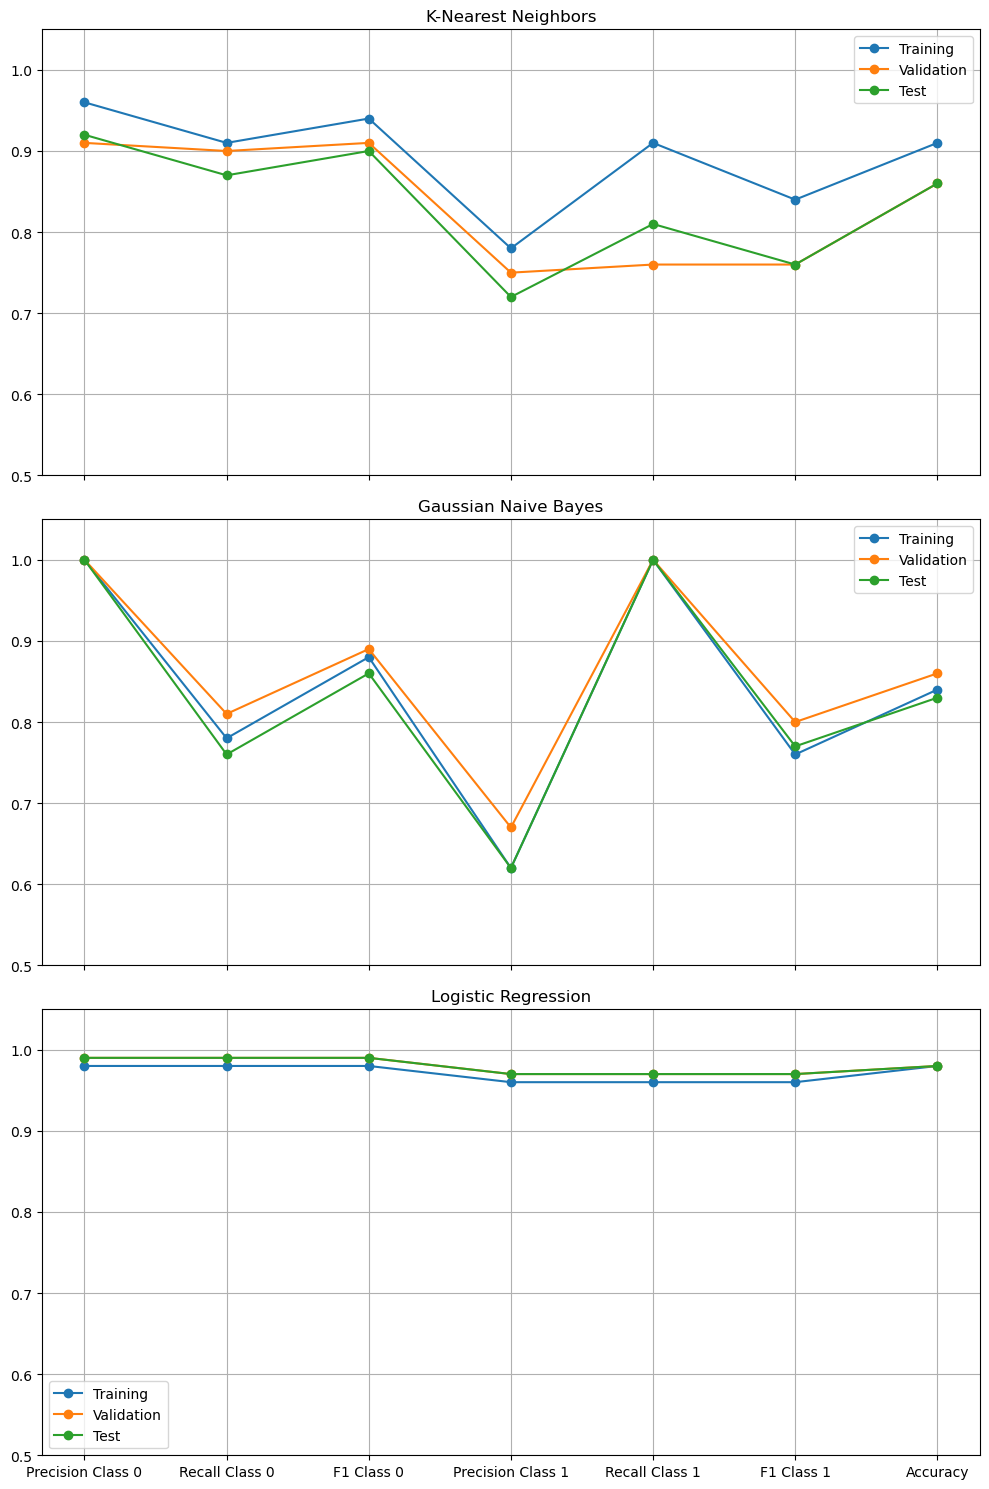

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model and dataset
metrics_knn = {'Training': [0.96, 0.91, 0.94, 0.78, 0.91, 0.84, 0.91],
               'Validation': [0.91, 0.90, 0.91, 0.75, 0.76, 0.76, 0.86],
               'Test': [0.92, 0.87, 0.90, 0.72, 0.81, 0.76, 0.86]}

metrics_gnb = {'Training': [1.00, 0.78, 0.88, 0.62, 1.00, 0.76, 0.84],
               'Validation': [1.00, 0.81, 0.89, 0.67, 1.00, 0.80, 0.86],
               'Test': [1.00, 0.76, 0.86, 0.62, 1.00, 0.77, 0.83]}

metrics_logistic = {'Training': [0.98, 0.98, 0.98, 0.96, 0.96, 0.96, 0.98],
                    'Validation': [0.99, 0.99, 0.99, 0.97, 0.97, 0.97, 0.98],
                    'Test': [0.99, 0.99, 0.99, 0.97, 0.97, 0.97, 0.98]}

# Metric labels
metric_labels = ['Precision Class 0', 'Recall Class 0', 'F1 Class 0',
                 'Precision Class 1', 'Recall Class 1', 'F1 Class 1', 'Accuracy']

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

# Titles for each subplot
titles = ['K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Logistic Regression']

for ax, model_metrics, title in zip(axes, [metrics_knn, metrics_gnb, metrics_logistic], titles):
    ax.plot(metric_labels, model_metrics['Training'], label='Training', marker='o')
    ax.plot(metric_labels, model_metrics['Validation'], label='Validation', marker='o')
    ax.plot(metric_labels, model_metrics['Test'], label='Test', marker='o')
    ax.set_title(title)
    ax.set_ylim(0.5, 1.05)  # Limiting y-axis for better visibility
    ax.legend()
    ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Logistic Regression appears to be the strongest model based on the provided metrics, showing high and stable scores across all datasets and both classes.
While KNN also shows good and stable performance, it does not reach the peak performance of the Logistic Regression model.
GNB seems to be the least reliable, with inconsistent scores that vary more widely across different evaluation metrics and datasets.

# RESULTS

In [ ]:
def calculate_permutation_importance(model, X, y, feature_names):
    r = permutation_importance(model, X, y, n_repeats=30, random_state=42)
    for i in r.importances_mean.argsort()[::-1]:
        print(f"{feature_names[i]:<8} "
              f"{r.importances_mean[i]:.3f} "
              f"± {r.importances_std[i]:.3f}")

feature_names = X.columns

print("KNN Model Permutation Importance:")
calculate_permutation_importance(knn_model, X_val, y_val, feature_names)

print("GNB Model Permutation Importance:")
calculate_permutation_importance(gnb_model, X_val, y_val, feature_names)


KNN Model Permutation Importance:
Customer ID 0.066 ± 0.008
Location 0.012 ± 0.010
Color    0.009 ± 0.007
Frequency of Purchases 0.007 ± 0.005
Size     0.006 ± 0.006
Payment Method 0.006 ± 0.006
Previous Purchases 0.005 ± 0.006
Purchase Amount (USD) 0.003 ± 0.006
Promo Code Used 0.003 ± 0.007
Discount Applied 0.003 ± 0.007
Season   0.002 ± 0.007
Review Rating 0.002 ± 0.007
Age      0.000 ± 0.007
Gender   0.000 ± 0.001
Shipping Type -0.002 ± 0.006
Review_Rating_Category -0.002 ± 0.008
AgeGroup -0.004 ± 0.005
Item Purchased -0.004 ± 0.006
Category -0.007 ± 0.005
GNB Model Permutation Importance:
Promo Code Used 0.082 ± 0.010
Discount Applied 0.082 ± 0.010
Gender   0.046 ± 0.012
Customer ID 0.030 ± 0.011
Size     0.000 ± 0.000
Age      0.000 ± 0.000
Item Purchased 0.000 ± 0.000
Category 0.000 ± 0.000
Purchase Amount (USD) 0.000 ± 0.000
Location 0.000 ± 0.000
Review_Rating_Category 0.000 ± 0.000
Color    0.000 ± 0.000
AgeGroup 0.000 ± 0.000
Review Rating 0.000 ± 0.000
Shipping Type 0.000 ±

The Logistic Regression model presents consistent accuracy across training, validation, and test sets. It demonstrates high performance that does not degrade from training to testing, suggesting good generalization without signs of overfitting.

Accuracy: A high accuracy across training, validation, and test sets suggests the model is good at predicting who will or will not subscribe.

Precision: High precision for the subscribed class means that when the model predicts a customer will subscribe, it is correct most of the time.

Recall: High recall for the subscribed class indicates the model is good at identifying all the customers who will subscribe.